<a href="https://colab.research.google.com/github/MassielC/fish_tracking/blob/main/Fish_tracking_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://pepy.tech/project/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/107.7 GB disk)


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 83.2MB/s]
Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 11.1MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 21.4ms
Speed: 1.9ms preprocess, 21.4ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!unzip -q fish_training.zip -d datasets

# 2. Train

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=custom_data.yaml epochs=140 imgsz=640

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom_data.yaml, epochs=140, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

In [ ]:
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO("best.pt")

# Run the detection and tracking on your video
results = model.track(source="peak_2sickfish.mp4", save_txt=True, save=True,save_conf=True)


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/999) /content/peak_2sickfish.mp4: 640x640 6 fishs, 383.8ms
video 1/1 (frame 2/999) /content/peak_2sickfish.mp4:

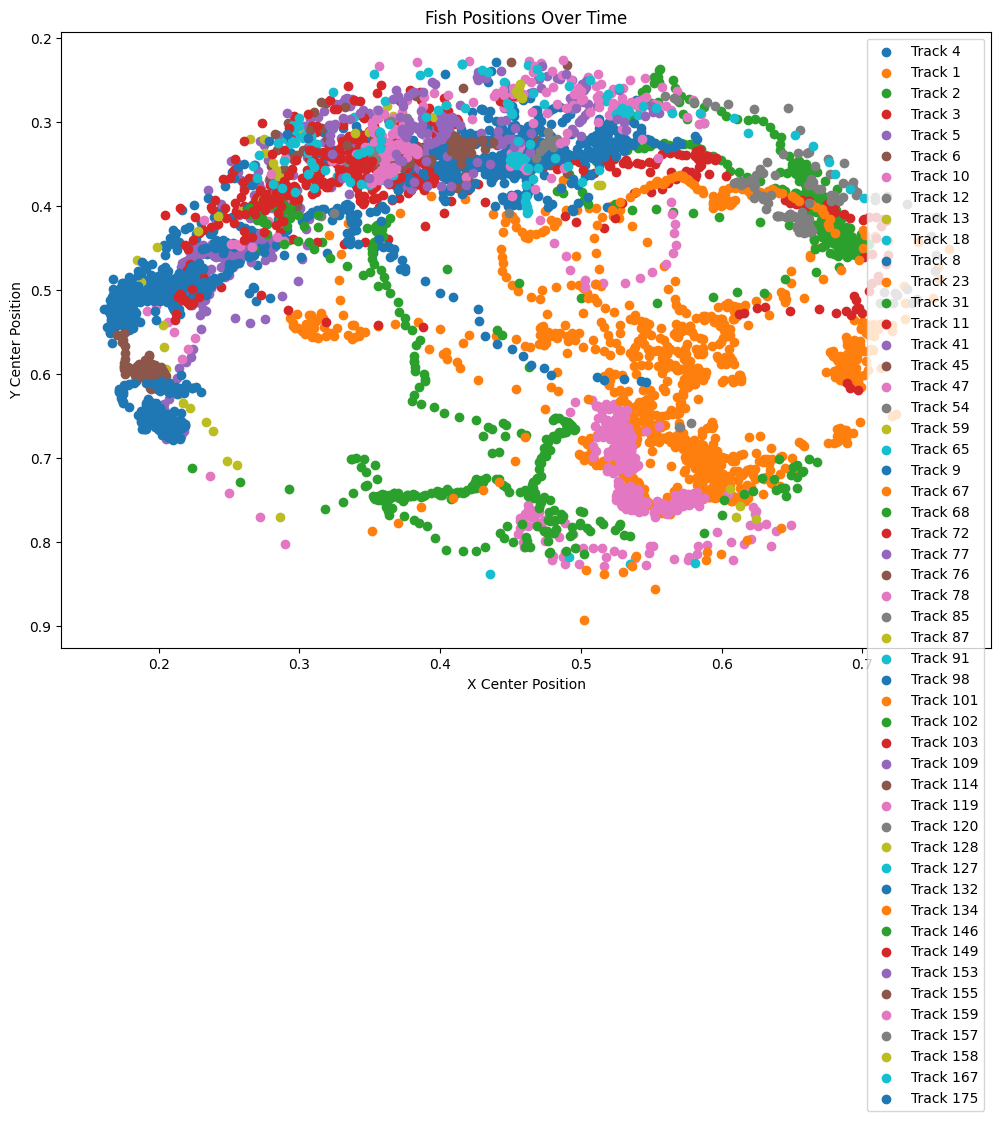

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Directory where tracking results are saved
results_dir = 'runs/detect/track/labels'

# List to store the positional data
data = []

# Regular expression to extract frame number
frame_re = re.compile(r'_([0-9]+)\.txt$')

# Iterate through the result files
for file in os.listdir(results_dir):
    if file.endswith('.txt'):
        match = frame_re.search(file)
        if match:
            frame_number = int(match.group(1))
            file_path = os.path.join(results_dir, file)
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 7:  # Adjust based on actual format
                        class_id, x_center, y_center, width, height, conf, track_id = map(float, parts)
                        data.append([frame_number, track_id, x_center, y_center, width, height, conf])

# Create a DataFrame from the positional data
df = pd.DataFrame(data, columns=['frame', 'track_id', 'x_center', 'y_center', 'width', 'height', 'conf'])

# Combine tracks 12, 5, and 2 into a single track ID, say 999
df['track_id'] = df['track_id'].replace({19: 8, 38: 8, 100: 8, 115:8,105:8, 166:8})

# Combine tracks 13 and 15 into a single track ID, say 888
df['track_id'] = df['track_id'].replace({131: 9, 66: 9})

df['track_id'] = df['track_id'].replace({29: 10, 7: 10})

df['track_id'] = df['track_id'].replace({90: 11, 69: 11,121:11,66:11,34:11})

# Remove track 6
#df = df[df['track_id'] != 6]

# Convert frame numbers to integers for sorting
df['frame'] = df['frame'].astype(int)

# Sort the DataFrame by frame number
df = df.sort_values('frame')

# Define custom colors for tracks
color_map = {
    10: 'royalblue',    # Combined track 12, 5, 2
    0: 'limegreen',   # Combined track 13, 15
    4: 'red',       # Track 4
    3: 'coral',    # Track 9
    9: 'black',   # Track 10
    1: 'brown',    # Track 11
    14: 'pink',      # Track 7
    8: 'violet',      # Track 8
    7: 'gold'    # Track 14
}

# Create a scatter plot with custom colors
plt.figure(figsize=(12, 8))
unique_track_ids = df['track_id'].unique()

for track_id in unique_track_ids:
    track_df = df[df['track_id'] == track_id]
    plt.scatter(track_df['x_center'], track_df['y_center'],  label=f'Track {int(track_id)}')

plt.xlabel('X Center Position')
plt.ylabel('Y Center Position')
plt.title('Fish Positions Over Time')
plt.legend()

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()



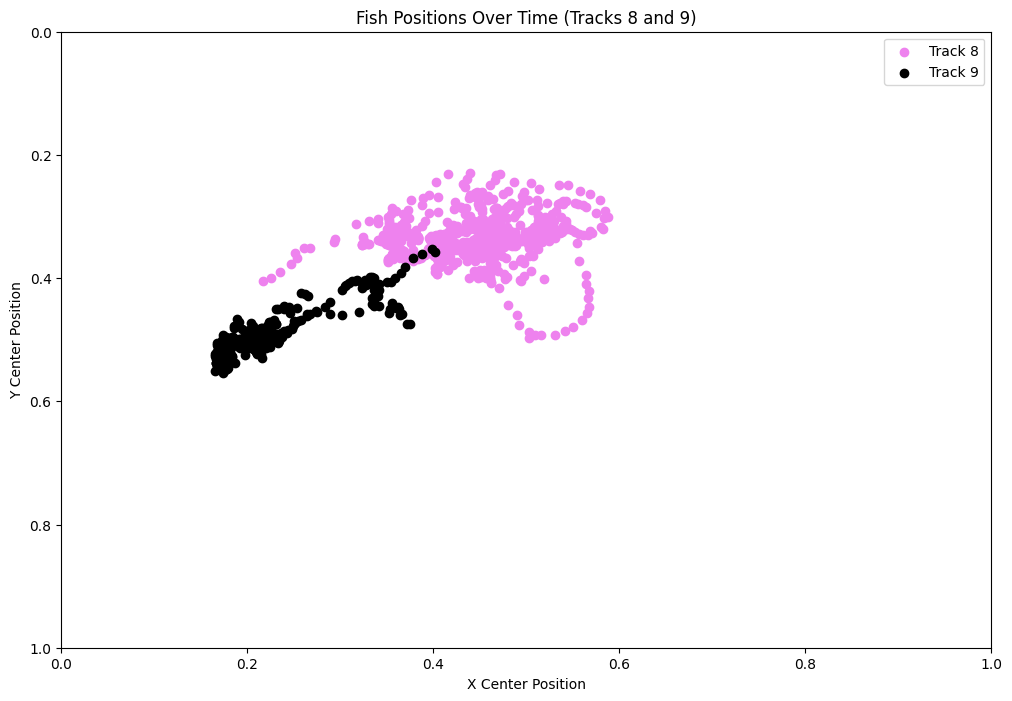

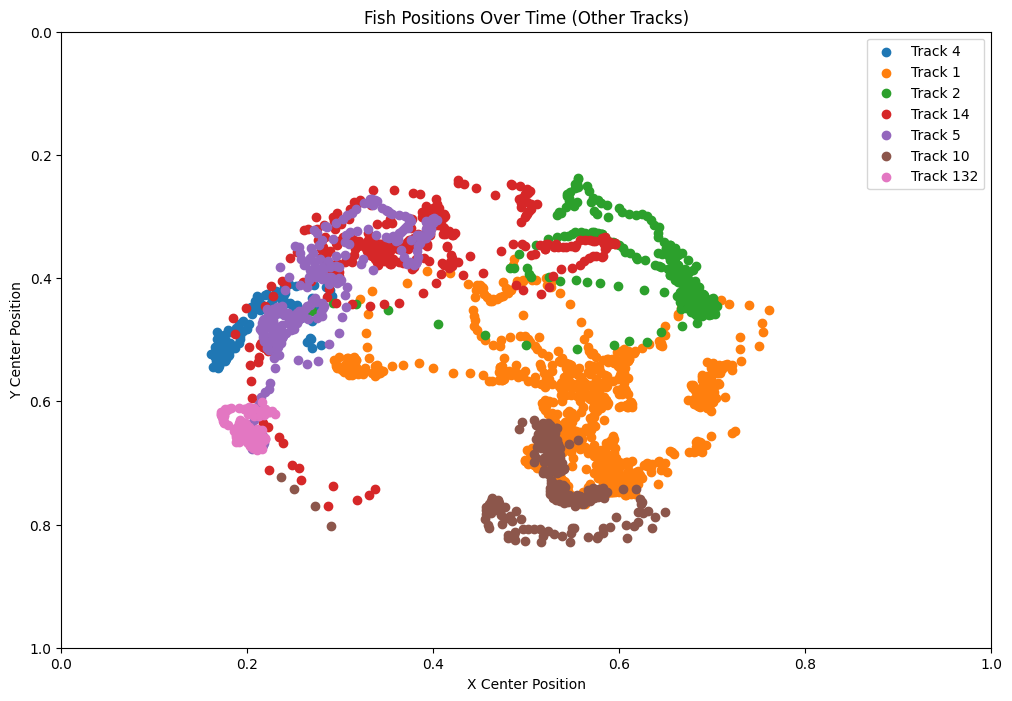

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Directory where tracking results are saved
results_dir = 'runs/detect/track/labels'

# List to store the positional data
data = []

# Regular expression to extract frame number
frame_re = re.compile(r'_([0-9]+)\.txt$')

# Iterate through the result files
for file in os.listdir(results_dir):
    if file.endswith('.txt'):
        match = frame_re.search(file)
        if match:
            frame_number = int(match.group(1))
            file_path = os.path.join(results_dir, file)
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 7:  # Adjust based on actual format
                        class_id, x_center, y_center, width, height, conf, track_id = map(float, parts)
                        data.append([frame_number, track_id, x_center, y_center, width, height, conf])

# Create a DataFrame from the positional data
df = pd.DataFrame(data, columns=['frame', 'track_id', 'x_center', 'y_center', 'width', 'height', 'conf'])

# Combine tracks into specific track IDs
df['track_id'] = df['track_id'].replace({19: 8, 38: 8, 100: 8, 115: 8, 105: 8, 166: 8, 127:8,119:8})
df['track_id'] = df['track_id'].replace({131: 9, 66: 9})
df['track_id'] = df['track_id'].replace({29: 10, 7: 10})
df['track_id'] = df['track_id'].replace({90: 11, 69: 11, 121: 11, 66: 11, 34: 11})
df['track_id'] = df['track_id'].replace({3: 14, 41: 14, 45: 14, 59: 14, 68: 14,72:14})
3,41,45,59
# Convert frame numbers to integers for sorting
df['frame'] = df['frame'].astype(int)

# Sort the DataFrame by frame number
df = df.sort_values('frame')

# Identify the 10 tracks with the least number of data points
track_counts = df['track_id'].value_counts()
least_data_points_tracks = track_counts.nsmallest(35).index

# Remove these tracks from the DataFrame
df = df[~df['track_id'].isin(least_data_points_tracks)]

# Define colors for tracks
color_map = {
    8: 'violet',    # Track 8
    9: 'black',     # Track 9
    10: 'royalblue', # Track 10
    11: 'brown'     # Track 11
}

# Set axis limits
x_limits = (0, 1)
y_limits = (0, 1)

# Plot 1: Tracks 8 and 9
plt.figure(figsize=(12, 8))
for track_id in [8, 9]:
    track_df = df[df['track_id'] == track_id]
    plt.scatter(track_df['x_center'], track_df['y_center'], color=color_map[track_id], label=f'Track {int(track_id)}')

plt.xlabel('X Center Position')
plt.ylabel('Y Center Position')
plt.title('Fish Positions Over Time (Tracks 8 and 9)')
plt.legend()
plt.xlim(x_limits)
plt.ylim(y_limits)

# Invert the y-axis
plt.gca().invert_yaxis()

# Save the plot as an image file for publication
plt.savefig('fish_density_plot_tracks_8_9.png', dpi=300, bbox_inches='tight')

plt.show()

# Plot 2: All other tracks
plt.figure(figsize=(12, 8))
for track_id in df['track_id'].unique():
    if track_id not in [8, 9]:
        track_df = df[df['track_id'] == track_id]
        plt.scatter(track_df['x_center'], track_df['y_center'], label=f'Track {int(track_id)}')

plt.xlabel('X Center Position')
plt.ylabel('Y Center Position')
plt.title('Fish Positions Over Time (Other Tracks)')
plt.legend()
plt.xlim(x_limits)
plt.ylim(y_limits)

# Invert the y-axis
plt.gca().invert_yaxis()

# Save the plot as an image file for publication
plt.savefig('fish_density_plot_other_tracks.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
track_counts = df['track_id'].value_counts()
least_data_points_track = track_counts.idxmin()
print(track_counts)

track_id
1.0      972
8.0      906
9.0      614
14.0     439
5.0      427
4.0      368
2.0      353
132.0    333
10.0     323
102.0    298
119.0    254
11.0     235
157.0    127
134.0    123
6.0      115
153.0    112
149.0     88
114.0     81
146.0     60
78.0      52
167.0     50
65.0      38
91.0      32
127.0     25
175.0     23
12.0      21
101.0     18
67.0      17
98.0      12
76.0      12
54.0      12
155.0     11
120.0     10
77.0       9
47.0       8
23.0       7
128.0      6
87.0       6
103.0      5
159.0      5
13.0       5
18.0       4
31.0       3
85.0       3
109.0      2
158.0      2
Name: count, dtype: int64


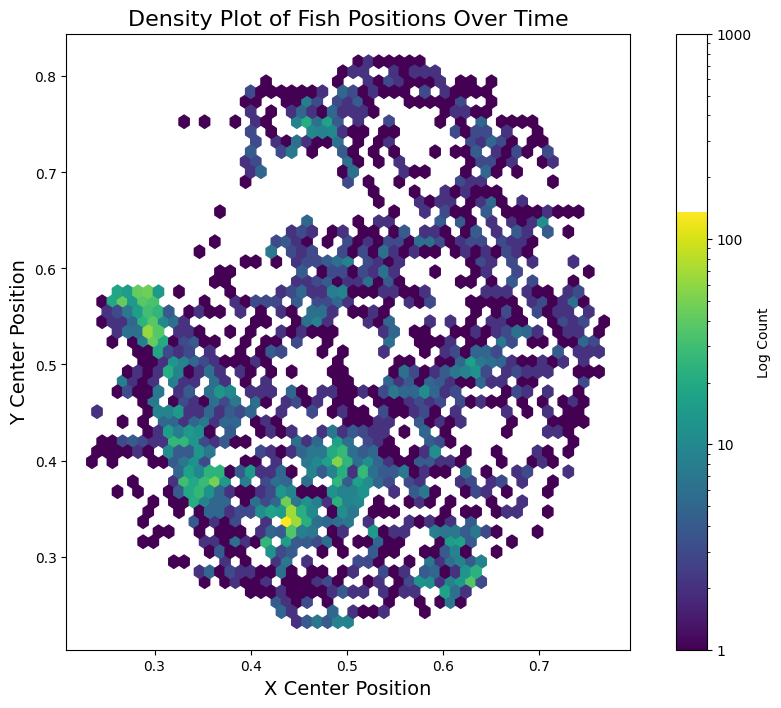

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Directory where tracking results are saved
results_dir = 'runs/detect/track2/labels'
# List to store the positional data
data = []

# Regular expression to extract frame number
frame_re = re.compile(r'_([0-9]+)\.txt$')

# Iterate through the result files
for file in os.listdir(results_dir):
    if file.endswith('.txt'):
        match = frame_re.search(file)
        if match:
            frame_number = int(match.group(1))
            file_path = os.path.join(results_dir, file)
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 7:  # Adjust based on actual format
                        class_id, x_center, y_center, width, height, conf, track_id = map(float, parts)
                        data.append([frame_number, track_id, x_center, y_center, width, height, conf])

# Create a DataFrame from the positional data
df = pd.DataFrame(data, columns=['frame', 'track_id', 'x_center', 'y_center', 'width', 'height', 'conf'])

# Display the DataFrame
df.head()

# Convert frame numbers to integers for sorting
df['frame'] = df['frame'].astype(int)

# Sort the DataFrame by frame number
df = df.sort_values('frame')

# Create a heatmap
plt.figure(figsize=(12, 8))

# Define the bin size for the heatmap
bin_size = 50  # Adjust based on your data's resolution

# Create the heatmap using hexbin with a logarithmic scale
hb = plt.hexbin(df['x_center'], df['y_center'], gridsize=bin_size, cmap='viridis', norm=mcolors.LogNorm())

# Enhance the color bar
cbar = plt.colorbar(hb, label='Log Count')
cbar.set_ticks([1, 10, 100, 1000])
cbar.set_ticklabels(['1', '10', '100', '1000'])

# Add descriptive axis labels and title
plt.xlabel('X Center Position', fontsize=14)
plt.ylabel('Y Center Position', fontsize=14)
plt.title('Density Plot of Fish Positions Over Time', fontsize=16)

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Save the plot as an image file for publication
plt.savefig('fish_density_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# 4. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolov8n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`, `batch`                                                     |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |

In [ ]:
!yolo export model=yolov8n.pt format=torchscript

Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.2.1+cu121...
TorchScript: export success ✅ 2.0s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (4.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco8.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

# 6. Tasks

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image